In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy.stats import probplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from google.cloud import bigquery
from google.oauth2 import service_account
from googleapiclient.discovery import build
import os

In [7]:
df1 = pd.read_excel("/content/drive/MyDrive/Capstone/dataset_capstone.xlsx")
df1.shape

(697846, 26)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New section

In [9]:
df1 = df1.iloc[:690000,:]
df1.isna().sum()
df1 = df1.drop(columns = ['DOB','Pincode','Nominee Age','ExShowroom_Price','Manufacture Year','Created_date','Age','Renewdate'])
df1 = df1.dropna()
df1.columns

Index(['Gender', 'State', 'City', 'Marital Status', 'Nominee Relation',
       'Income level', 'Education level', 'Occupation Type', 'Parking Type',
       'Vehicle Class', 'Policy Effective Date', 'Finance Status (Y/N)',
       'Model_Name', 'IC_name', 'VehicleType', 'Frame No', 'Enngine No',
       'Renewal_Status'],
      dtype='object')

In [10]:
df1 = df1.astype(str)
df1.head(2)


,Gender,State,City,Marital Status,Nominee Relation,Income level,Education level,Occupation Type,Parking Type,Vehicle Class,Policy Effective Date,Finance Status (Y/N),Model_Name,IC_name,VehicleType,Frame No,Enngine No,Renewal_Status
0,M,TAMIL NADU,Viluppuram,M,Wife,5000To10000,12th,Self Employed,Own_Inside,Private,Apr 1 2021,Y,SPLENDOR + BS6-I3S DRS,HDFC ERGO General Insurance Company,Bike,AW125M5B01355,EYM5B51311,0
1,M,UTTAR PRADESH,MUZAFFAR NAGAR,M,Wife,10000To20000,10th,Business,Own_Inside,Private,Apr 1 2021,Y,SPLENDOR+ BS6 DRS CAST FI,HDFC ERGO General Insurance Company,Bike,AW119MHC59512,EVMHCB1256,0


In [11]:
from sklearn.model_selection import train_test_split
#Get independent variables
X = df1.drop(columns = ['Renewal_Status'])
#Get dependent variable
Renewal_Status_column = df1.loc[:,'Renewal_Status']
#Turn dependent variable into an array
y = Renewal_Status_column.values
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Gender', 'State', 'City', 'Marital Status', 'Nominee Relation',
       'Income level', 'Education level', 'Occupation Type', 'Parking Type',
       'Vehicle Class', 'Policy Effective Date', 'Finance Status (Y/N)',
       'Model_Name', 'IC_name', 'VehicleType', 'Frame No', 'Enngine No'
       ]
le = LabelEncoder()
# apply label encoder on categorical feature columns
#X_train[categorical_cols] = X_train[categorical_cols].apply(lambda col: le.fit_transform(col))
#X_test[categorical_cols] = X_test[categorical_cols].apply(lambda col: le.fit_transform(col))
#y_train[categorical_cols] = y_train[categorical_cols].apply(lambda col: le.fit_transform(col))
#y_test[categorical_cols] = y_test[categorical_cols].apply(lambda col: le.fit_transform(col))

In [13]:
X_train[categorical_cols] = X_train[categorical_cols].apply(lambda col: le.fit_transform(col))

In [14]:
X_train['Enngine No'].head()

632139    214392
86877     402335
170652    333055
457345    429073
195995    525523
Name: Enngine No, dtype: int64

In [15]:
X_train1 = le.inverse_transform(X_train['Enngine No'])

In [16]:
X_test[categorical_cols] = X_test[categorical_cols].apply(lambda col: le.fit_transform(col))

In [17]:
X_test1 = le.inverse_transform(X_test['Enngine No'])

In [18]:
X_train1

array(['ERLHM04885', 'EWLHK10048', 'EVM5B59768', ..., 'EVM5A02113',
       'ADM9B05676', 'EDMHC38484'], dtype=object)

In [19]:
X_test.head()

,Gender,State,City,Marital Status,Nominee Relation,Income level,Education level,Occupation Type,Parking Type,Vehicle Class,Policy Effective Date,Finance Status (Y/N),Model_Name,IC_name,VehicleType,Frame No,Enngine No
22145,1,15,491,2,14,1,3,7,0,1,3,1,62,6,0,54884,129978
136069,1,4,2151,2,14,0,3,17,1,1,14,1,60,6,0,36427,96726
194126,1,32,1670,3,3,4,1,2,1,1,19,0,34,2,0,85776,111706
285049,0,32,1752,2,8,4,1,2,0,1,27,1,76,2,0,120177,5490
625515,1,32,1328,2,16,1,2,17,0,1,57,0,62,2,0,73137,31096


In [20]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=2500,
                                   random_state=42)

In [21]:
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=2500, random_state=42)

In [22]:
y_pred = log_reg_model.predict(X_test) # Predictions
y_true = y_test # True values
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

0.1225069564837342

In [23]:
score = log_reg_model.score(X_test, y_test)
print("Test Accuracy Score", score)

Test Accuracy Score 0.8774930435162658


In [24]:

y_true = pd.DataFrame(list(zip(y_test,y_true)),columns=['Actual','Predicted'])
y_true.to_csv("y_true.csv")


Confusion Matrix


Text(50.722222222222214, 0.5, 'True')

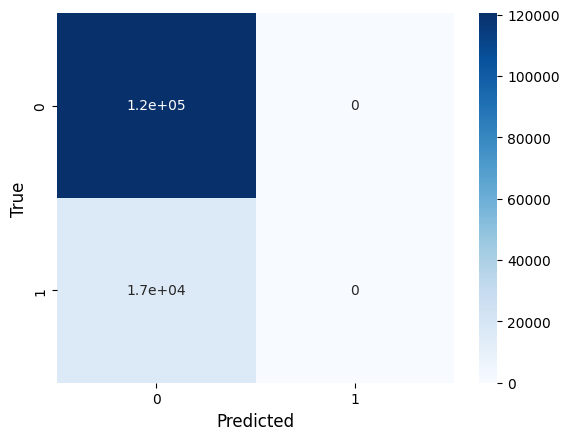

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

LOGISTIC REGRESSION - DEEP LEARNING (KERAS)

In [26]:
from keras.models import Sequential
import tensorflow as tf

In [27]:
X.shape

(686406, 17)

In [28]:
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense,Flatten

#ANN_model.add(InputLayer(Flatten(input_shape=(30, ))))
# No hidden layers
#ANN_model.add(Dense(1, activation='sigmoid'))
model = Sequential()
model.add(Dense(24, input_shape=(17,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

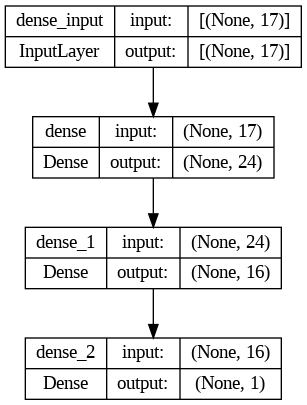

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                432       
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


In [27]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=2)

Epoch 1/15


UnimplementedError: ignored

In [ ]:
#predict whether customers in test dataset will renew or not
y_pred = model.predict(X_test)
#y_pred = (y_pred > 0.5)
df_final = pd.DataFrame(list(zip(y_test, y_pred)), columns=['Actual', 'Predicted'])
df_final.to_csv("df_final.csv")

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
accuracy = model.evaluate(X_train, y_train,verbose=5)
print(accuracy)

In [ ]:
predictions = (model.predict(X_test)).astype(int)
# summarize the first 5 cases
predictions = pd.DataFrame(predictions)
predictions.to_csv("predictions.csv")

PUSHING DATA IN BIGQUERY FOR TABLEAU

In [29]:
X_train1

array(['ERLHM04885', 'EWLHK10048', 'EVM5B59768', ..., 'EVM5A02113',
       'ADM9B05676', 'EDMHC38484'], dtype=object)

In [30]:
X_train1 = pd.DataFrame(X_train1)

In [31]:
X_test1 = pd.DataFrame(X_test1)

In [32]:
y_true = pd.DataFrame(y_true)

In [33]:
print(X_test1.shape)
print(y_true.shape)

(137282, 1)
(137282, 2)


In [34]:
y_true['Predicted']

0         1
1         0
2         0
3         0
4         0
         ..
137277    0
137278    0
137279    0
137280    0
137281    0
Name: Predicted, Length: 137282, dtype: object

In [35]:
bqpush = pd.concat([X_test1,y_true],axis=1)

In [36]:
bqpush.head()

,0,Actual,Predicted
0,EYMHB65580,1,1
1,EVMHCC1744,0,0
2,EWMHC18768,0,0
3,ABLGM06413,0,0
4,EDMHB06321,0,0


In [37]:
bqpush.reset_index(level=0, inplace=True)

In [38]:
bqpush.head()

,index,0,Actual,Predicted
0,0,EYMHB65580,1,1
1,1,EVMHCC1744,0,0
2,2,EWMHC18768,0,0
3,3,ABLGM06413,0,0
4,4,EDMHB06321,0,0


In [39]:
bqpush = bqpush.drop(['index'],axis=1)

In [40]:
bqpush.head()

,0,Actual,Predicted
0,EYMHB65580,1,1
1,EVMHCC1744,0,0
2,EWMHC18768,0,0
3,ABLGM06413,0,0
4,EDMHB06321,0,0


In [41]:
bqpush.rename(columns={0:'Engine Number'},inplace=True)

In [42]:
bqpush.head()

,Engine Number,Actual,Predicted
0,EYMHB65580,1,1
1,EVMHCC1744,0,0
2,EWMHC18768,0,0
3,ABLGM06413,0,0
4,EDMHB06321,0,0


In [43]:
bqpush['Engine Number'] = bqpush['Engine Number'].astype(str)
bqpush.head()

,Engine Number,Actual,Predicted
0,EYMHB65580,1,1
1,EVMHCC1744,0,0
2,EWMHC18768,0,0
3,ABLGM06413,0,0
4,EDMHB06321,0,0


In [44]:
bqpush.dtypes

Engine Number    object
Actual           object
Predicted        object
dtype: object

In [45]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/Capstone/bigquerydemo1.json"

key_path = '/content/drive/MyDrive/Capstone/bigquerydemo1.json'
credentials = service_account.Credentials.from_service_account_file(
key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
    )

# Construct a BigQuery client object.
client = bigquery.Client()

table_id = 'bigquerydemo-286816.capstone.final'
table = client.get_table(table_id)
job = client.load_table_from_dataframe(bqpush, table_id)
print("Loaded {} rows and {} columns to {}".format(table.num_rows, len(table.schema), table_id))


Loaded 274564 rows and 3 columns to bigquerydemo-286816.capstone.final


In [46]:
import pandas
import gspread
from gspread_dataframe import set_with_dataframe
from google.oauth2.service_account import Credentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
scopes = ['https://www.googleapis.com/auth/spreadsheets',
          'https://www.googleapis.com/auth/drive']

credentials = Credentials.from_service_account_file('/content/drive/MyDrive/Capstone/bigquerydemo1.json', scopes=scopes)

gc = gspread.authorize(credentials)

gauth = GoogleAuth()
drive = GoogleDrive(gauth)

# open a google sheet
gs = gc.open_by_key("1PzU2gx66OgIsCwVwdVi5_hz5xbFtO4eGP10ZUrSU12s")
# select a work sheet from its name
worksheet1 = gs.worksheet('Sheet1')

In [47]:
worksheet1.clear()
set_with_dataframe(worksheet=worksheet1, dataframe=bqpush, include_index=False,
include_column_header=True, resize=True)